## Demo

import the libs

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

%matplotlib inline
import PIL

import numpy as np
import keras
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Dense, Flatten
from keras.models import Model
import keras.backend as k
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import BoundaryAttack
from art.utils import to_categorical

Open the image

In [21]:
from PIL import Image, ImageOps, ImageEnhance
image = Image.open('demoImage/1.png')
#image.show()

Distortion

In [23]:
class WaveDeformer:
    def transform(self, x, y):
        y = y + 40* math.sin(x / 40) 
        return x, y 
    def transform_rectangle(self, x0, y0, x1, y1): 
        return (*self.transform(x0, y0),
                *self.transform(x0, y1),
                *self.transform(x1, y1),
                *self.transform(x1, y0),)                                                                   
    def getmesh(self, img): 
        self.w, self.h = img.size 
        gridspace = 20
        target_grid = []
        for x in range(0, self.w, gridspace):
            for y in range(0, self.h, gridspace): 
                target_grid.append((x, y, x + gridspace, y + gridspace))
    
        source_grid = [self.transform_rectangle(*rect) for rect in target_grid] 
        return [t for t in zip(target_grid, source_grid)]
        target_grid = []
        for x in range(0, self.w, gridspace):
            for y in range(0, self.h, gridspace): 
                target_grid.append((x, y, x + gridspace, y + gridspace))
                
        source_grid = [self.transform_rectangle(*rect) for rect in target_grid]

In [24]:
import math
image = Image.open('demoImage/1.png')
result_image = ImageOps.deform(image, WaveDeformer())
result_image.save('results/distorted1.png')

In [26]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

mean_imagenet = np.zeros([224, 224, 3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, np.ones([224, 224, 3])))

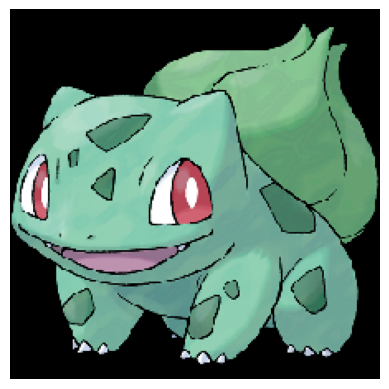

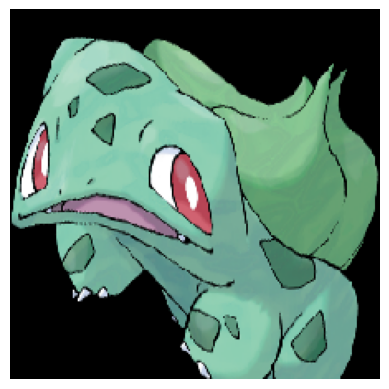

In [27]:
target_image_name = 'demoImage/1.png'
init_image_name = 'results/distorted1.png'
target_image = keras.utils.load_img(target_image_name, target_size=(224, 224))
target_image = keras.utils.img_to_array(target_image)
init_image = keras.utils.load_img(init_image_name, target_size=(224, 224))
init_image = keras.utils.img_to_array(init_image)

plt.imshow(target_image.astype(np.uint))
plt.axis('off')
plt.show()
plt.imshow(init_image.astype(np.uint))
plt.axis('off')
plt.show()

/Users/xuhuan/opt/anaconda3/envs/python37/lib/python3.7/site-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Boundary attack:   0%|          | 0/1 [00:00<?, ?it/s]

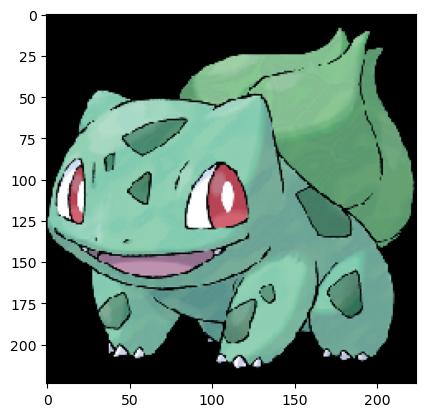

In [28]:
attack = BoundaryAttack(estimator=classifier, targeted=True, max_iter=0, delta=0.001, epsilon=0.001)
iter_step = 200
x_adv = np.array([init_image[..., ::-1]])

for i in range(20):
    x_adv = attack.generate(x=np.array([target_image[..., ::-1]]), y=to_categorical([866], 1000), x_adv_init=x_adv)

    #clear_output()    
    plt.imshow(x_adv[0][..., ::-1].astype(np.uint))
    plt.show(block=False)
    
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        attack.max_iter = iter_step 
        attack.delta = attack.curr_delta
        attack.epsilon = attack.curr_epsilon
    else:
        break

Boundary attack:   0%|          | 0/1 [00:00<?, ?it/s]

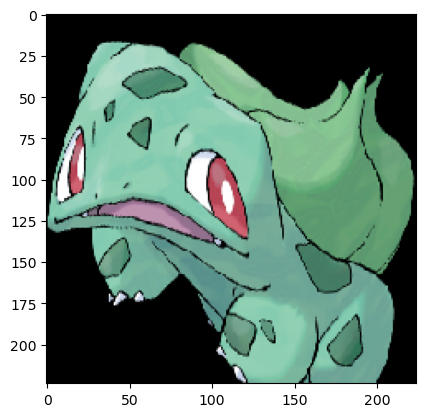

In [29]:
attack = BoundaryAttack(estimator=classifier, targeted=True, max_iter=0, delta=0.001, epsilon=0.001)
iter_step = 200
x_adv = np.array([target_image[..., ::-1]])

for i in range(20):
    x_adv = attack.generate(x=np.array([init_image[..., ::-1]]), y=to_categorical([866], 1000), x_adv_init=x_adv)

    #clear_output()    
    plt.imshow(x_adv[0][..., ::-1].astype(np.uint))
    plt.show(block=False)
    
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        attack.max_iter = iter_step 
        attack.delta = attack.curr_delta
        attack.epsilon = attack.curr_epsilon
    else:
        break